# Quartic multiple regression on different databases : effect of outlier on multiple regression

The best Multiple Regression with quartic interaction is trained with different databases on each output (elastic modulus E, hardness H, EBSD Confidence Index CI and Image Quality IQ) to assess the impact of data quality over the operformance of the model. 

For each output and each datasets:
 - import dataset as dataframe and compute Scheffé interaction terms for quartic multiple regression
 - iterative kfold crossvalidation on quartic multiple regression
 - return R² and MAE mean and standard deviation
 - plot MAE histogram and expected vs predicted regression on chosen number of fold and iterations

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MultipleRegression as MR
import os


## Path to datasets

In [2]:
datasets_dir=os.getenv("DATASETS_DIR")
run_dir=os.getenv("RUN_DIR")
print(datasets_dir)

/Users/elisegarel/Desktop/THESE/PUBLI_CONF/PUBLICATION/datasets/


## Effect of outliers on quartic multiple regression

### Raw data database 

#### Import database "Raw_data_corrected" and add the intercation columns

In [18]:
data=pd.read_csv(f"{datasets_dir}/Raw_data_corrected.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E 
Define X and y data and train the multiple regressions 

In [19]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)
print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8105613684938848 +/- 0.03975571739615889
MAE= 13.973672560872131 +/- 0.8539132376491041


Plot regression between test and predicted outputs, and metric histogram

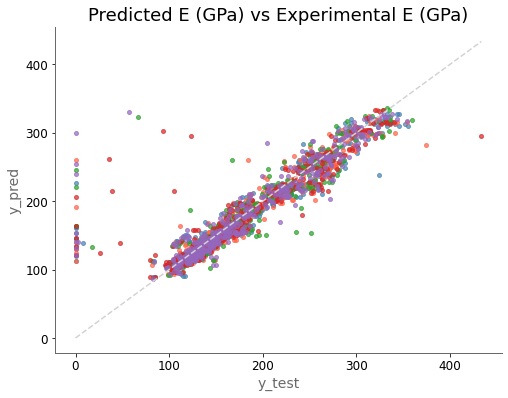

In [20]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, f"{run_dir}/MR/Raw_data_E_MAE.png", f"{run_dir}/MR/Raw_data_E.png")

#### For hardness H 
Define X and y data and train the multiple regressions 

In [21]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.7101189180786008 +/- 0.04617755364594785
MAE= 0.9101809802042949 +/- 0.06320428586738448


Plot regression between test and predicted outputs, and metric histogram

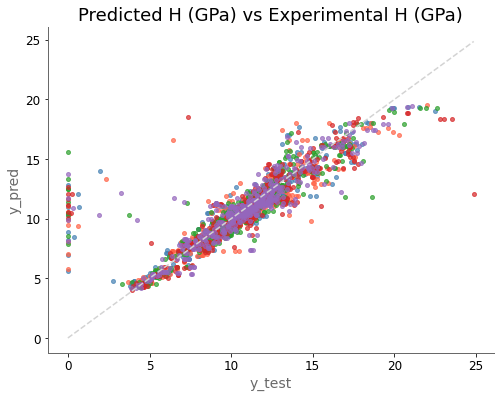

In [22]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/Raw_data_H_MAE.png", f"{run_dir}/MR/Raw_data_H.png")

### Threshold data database

#### Import database "Compo_E_H_threshold" and add the intercation columns

In [23]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_H_threshold.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [24]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9104984635807811 +/- 0.028132243587147093
MAE= 10.49311635481811 +/- 0.5993272546530058


Plot regression between test and predicted outputs, and metric histogram

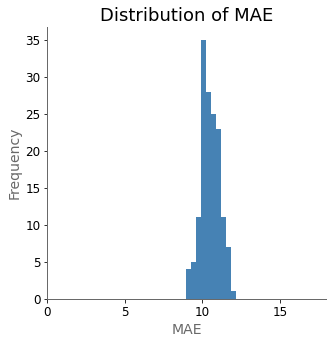

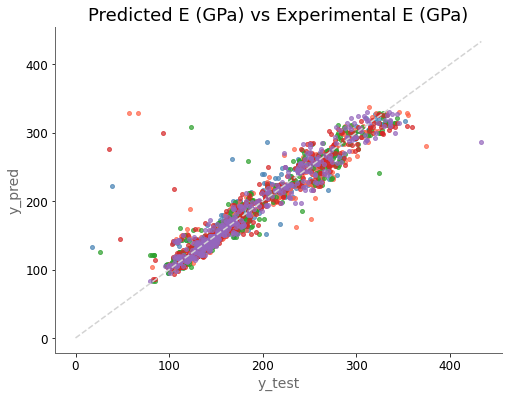

In [25]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test,0,18, 1,5, f"{run_dir}/MR/Threshold_E_MAE.png", f"{run_dir}/MR/Threshold_E.png")

#### For hardness H
Define X and y data and train the multiple regressions 

In [26]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8473074970129677 +/- 0.03675956199868373
MAE= 0.6979368972252648 +/- 0.04327794863714675


Plot regression between test and predicted outputs, and metric histogram

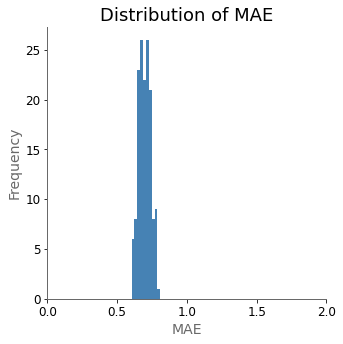

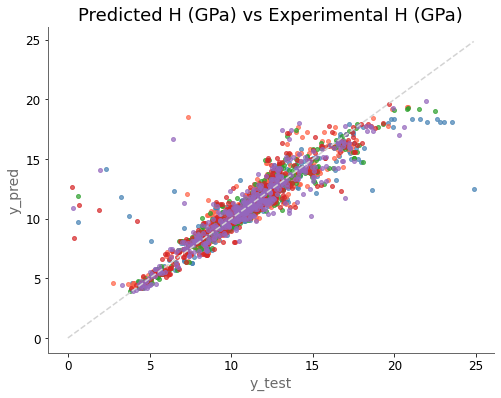

In [27]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/Threshold_H_MAE.png", f"{run_dir}/MR/Threshold_H.png")


### Statistically processed data database

#### For elastic modulus E
#### Import database "Compo_E_wo_outlier" for elastic modulus and add the intercation columns

In [28]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [29]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9506396734135628 +/- 0.009593016545813467
MAE= 9.345960163105428 +/- 0.40994590927077523


Plot regression between test and predicted outputs, and metric histogram

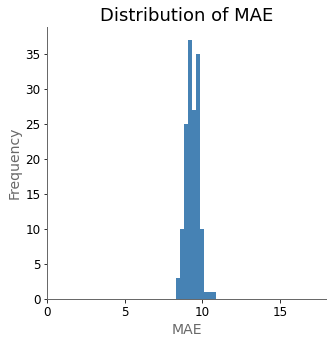

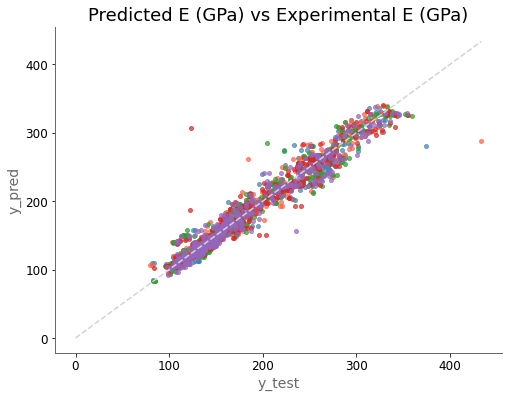

In [30]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18,1,5, f"{run_dir}/MR/No_outliers_E_MAE.png", f"{run_dir}/MR/No_outliers_E.png")


#### For hardness H
#### Import database "Compo_H_wo_outlier" for hardness and add the intercation columns

In [31]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [32]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9159686461185336 +/- 0.012988562056552896
MAE= 0.6060873195202912 +/- 0.028399932622822303


Plot regression between test and predicted outputs, and metric histogram

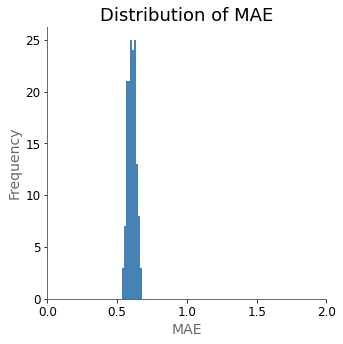

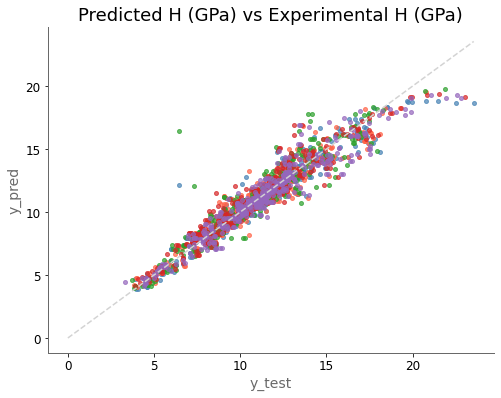

In [33]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/No_outliers_H_MAE.png", f"{run_dir}/MR/No_outliers_H.png")


### Data averaged database 

#### Import database "Data_averaged" and add the intercation columns

In [34]:
data=pd.read_csv(f"{datasets_dir}/Data_averaged.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','stdE','stdH','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [35]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9534876434241327 +/- 0.01739357256410738
MAE= 9.196909935342688 +/- 0.9140381371484695


Plot regression between test and predicted outputs, and metric histogram

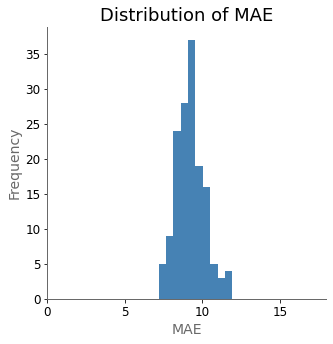

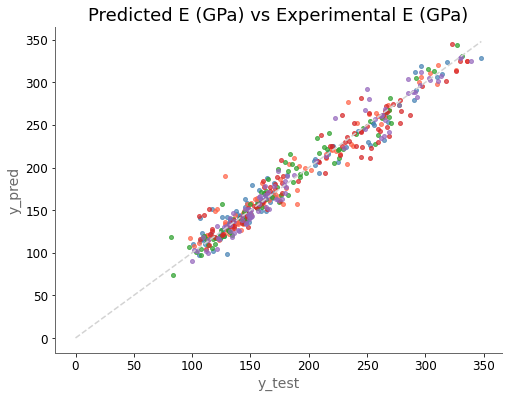

In [36]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, f"{run_dir}/MR/Averaged_E_MAE.png", f"{run_dir}/MR/Averaged_E.png")

### For hardness H
Define X and y data and train the multiple regressions 

In [37]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']
model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9060577348654135 +/- 0.02952101081393821
MAE= 0.6187127512782844 +/- 0.06443599201015458


Plot regression between test and predicted outputs, and metric histogram

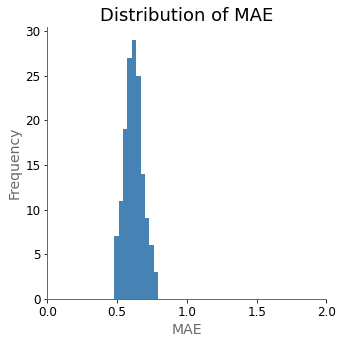

In [38]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test, 0,2, 1,5, f"{run_dir}/MR/Averaged_H_MAE.png", f"{run_dir}/MR/Averaged_H.png")

### For Confidence Index CI
Define X and y data and train the multiple regressions 

In [39]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['CI']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('CI ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'CI',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8398314143615822 +/- 0.06927246049670946
MAE= 0.055409910573055284 +/- 0.007291557712061781


Plot regression between test and predicted outputs, and metric histogram

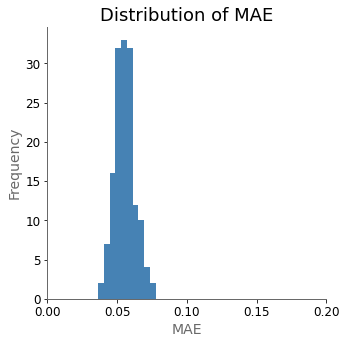

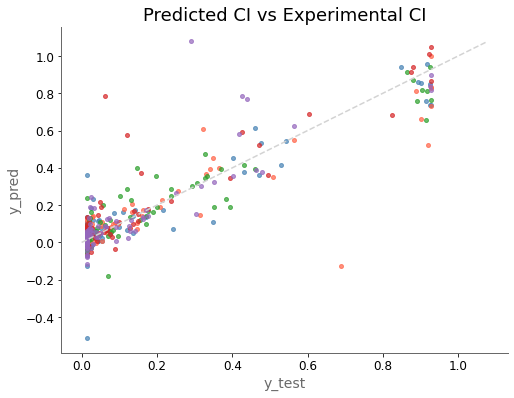

In [40]:
MR.plot_result( 'MAE', 'CI' , MAE_list, Y_pred, Y_test, 0,0.2,1,5, f"{run_dir}/MR/Averaged_CI_MAE.png", f"{run_dir}/MR/Averaged_CI.png")

### For Image Quality (IQ)
Define X and y data and train the multiple regressions 

In [41]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['IQ']

model,MAE_list, R2_adj_list,Y_pred,Y_test= MR.fit_outputs('IQ ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'IQ',X,y)
print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8690669062748778 +/- 0.05317703259137479
MAE= 4781.017548915441 +/- 591.8549257695388


Plot regression between test and predicted outputs, and metric histogram

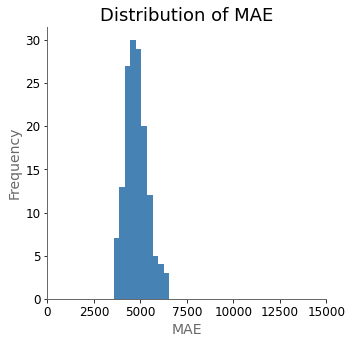

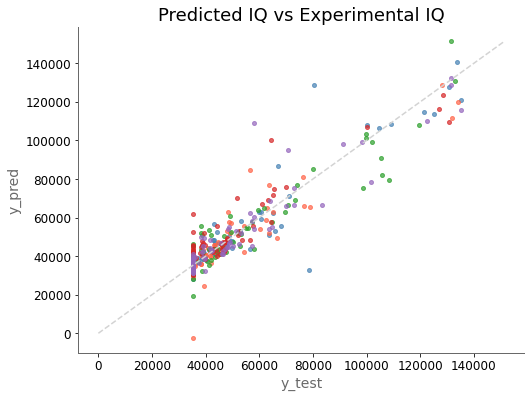

In [42]:
MR.plot_result( 'MAE', 'IQ' , MAE_list, Y_pred, Y_test,0,15000, 1,5, f"{run_dir}/MR/Averaged_IQ_MAE.png", f"{run_dir}/MR/Averaged_IQ.png")

## Regression coefficients plot for each composition or interaction terms an predictions

### For elastic modulus E
#### Import database "Compo_E_wo_outlier" and add the intercation columns


In [22]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)
display(data['Zr_Nb'])

compo2predict=pd.read_csv(f"{datasets_dir}composition2predict.csv",header=0)*100
prediction_MR=compo2predict.copy()
compo2predict=MR.Scheffe_interactions_terms(compo2predict)
display(compo2predict)



0      -0.0408
1      -0.0408
2      -0.0408
3      -0.0408
4      -0.0408
         ...  
2196   -0.1153
2197   -0.1153
2198   -0.1153
2199   -0.1153
2200   -0.1153
Name: Zr_Nb, Length: 2201, dtype: float64

Zr    Nb    Mo    Ti    Cr  Zr_Nb  Zr_Mo  Zr_Ti  Zr_Cr  Nb_Mo  ...  \
0       0.00  0.00  0.00  0.00  1.00   0.00   0.00   0.00  -1.00   0.00  ...   
1       0.00  0.00  0.00  0.02  0.98   0.00   0.00  -0.02  -0.98   0.00  ...   
2       0.00  0.00  0.00  0.04  0.96   0.00   0.00  -0.04  -0.96   0.00  ...   
3       0.00  0.00  0.00  0.06  0.94   0.00   0.00  -0.06  -0.94   0.00  ...   
4       0.00  0.00  0.00  0.08  0.92   0.00   0.00  -0.08  -0.92   0.00  ...   
...      ...   ...   ...   ...   ...    ...    ...    ...    ...    ...  ...   
316246  0.98  0.00  0.00  0.00  0.02   0.98   0.98   0.98   0.96   0.00  ...   
316247  0.98  0.00  0.00  0.02  0.00   0.98   0.98   0.96   0.98   0.00  ...   
316248  0.98  0.00  0.02  0.00  0.00   0.98   0.96   0.98   0.98  -0.02  ...   
316249  0.98  0.02  0.00  0.00  0.00   0.96   0.98   0.98   0.98   0.02  ...   
316250  1.00  0.00  0.00  0.00  0.00   1.00   1.00   1.00   1.00   0.00  ...   

        Zr_Nb2  Zr_Mo2  Zr_Ti2  Zr_Cr2  Nb_Mo2  Nb_Ti2  Nb_Cr2  Mo_Ti2  \
0       0.0000  0.0000  0.0000  1.0000  0.0000  0.0000  1.0000  0.0000   
1       0.0000  0.0000  0.0004  0.9604  0.0000  0.0004  0.9604  0.0004   
2       0.0000  0.0000  0.0016  0.9216  0.0000  0.0016  0.9216  0.0016   
3       0.0000  0.0000  0.0036  0.8836  0.0000  0.0036  0.8836  0.0036   
4       0.0000  0.0000  0.0064  0.8464  0.0000  0.0064  0.8464  0.0064   
...        ...     ...     ...     ...     ...     ...     ...     ...   
316246  0.9604  0.9604  0.9604  0.9216  0.0000  0.0000  0.0004  0.0000   
316247  0.9604  0.9604  0.9216  0.9604  0.0000  0.0004  0.0000  0.0004   
316248  0.9604  0.9216  0.9604  0.9604  0.0004  0.0000  0.0000  0.0004   
316249  0.9216  0.9604  0.9604  0.9604  0.0004  0.0004  0.0004  0.0000   
316250  1.0000  1.0000  1.0000  1.0000  0.0000  0.0000  0.0000  0.0000   

        Mo_Cr2  Ti_Cr2  
0       1.0000  1.0000  
1       0.9604  0.9216  
2       0.9216  0.8464  
3       0.8836  0.7744  
4       0.8464  0.7056  
...        ...     ...  
316246  0.0004  0.0004  
316247  0.0000  0.0004  
316248  0.0004  0.0000  
316249  0.0000  0.0000  
316250  0.0000  0.0000  

[316251 rows x 30 columns]

Define X and y data and train the multiple regressions 

In [23]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model_expression='E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_adj_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'E',X,y)


#predictionE=model.predict(compo2predict)

#prediction_MR['MR - Young Modulus Prediction']=predictionE

In [17]:
print(min(predictionH),max(predictionH))

-56.816381913486374 90.74870252028823


Coefficients extraction and apply root on coefficient 

In [24]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')   

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      E   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5181.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:16:49   Log-Likelihood:                         -7054.2
No. Observations:                1761   AIC:                                  1.425e+04
Df Residuals:                    1691   BIC:                                  1.463e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr             549.2959     85.685      6.411      0.000     381.236     717.356
Nb             191.0003     34.402      5.552      0.000     123.526     258.474
Mo             383.3676      8.076     47.471      0.000     367.528     399.207
Ti             -26.1155     51.878     -0.503      0.615    -127.868      75.637
Cr             260.5994      8.366     31.149      0.000     244.190     277.009
Zr:Nb         -668.0414    328.503     -2.034      0.042   -1312.357     -23.726
Zr:Mo        -2001.8978    231.899     -8.633      0.000   -2456.736   -1547.059
Zr:Ti         -966.4376    414.987     -2.329      0.020   -1780.380    -152.495
Zr:Cr        -1517.4240    215.861     -7.030      0.000   -1940.806   -1094.042
Nb:Mo         -206.4476     67.994     -3.036      0.002    -339.809     -73.087
Nb:Ti        -1377.1602    202.481     -6.801      0.000   -1774.300    -980.020
Nb:Cr         -628.6817    101.111     -6.218      0.000    -826.998    -430.366
Mo:Ti         -247.8209    128.659     -1.926      0.054    -500.168       4.527
Mo:Cr          511.8340     56.524      9.055      0.000     400.969     622.699
Ti:Cr          131.9043    222.702      0.592      0.554    -304.897     568.705
Zr:Nb:Zr_Nb  -1313.2445    871.020     -1.508      0.132   -3021.635     395.146
Zr:Mo:Zr_Mo  -2421.2734   1013.844     -2.388      0.017   -4409.794    -432.753
Zr:Ti:Zr_Ti   -898.6839    947.227     -0.949      0.343   -2756.545     959.177
Zr:Cr:Zr_Cr  -1228.9299    659.439     -1.864      0.063   -2522.332      64.473
Nb:Mo:Nb_Mo    226.7439    111.142      2.040      0.041       8.753     444.735
Nb:Ti:Nb_Ti    591.8612    669.230      0.884      0.377    -720.745    1904.468
Nb:Cr:Nb_Cr   -523.1466    248.125     -2.108      0.035   -1009.811     -36.482
Mo:Ti:Mo_Ti  -1129.0172    563.559     -2.003      0.045   -2234.365     -23.670
Mo:Cr:Mo_Cr    517.9693    138.400      3.743      0.000     246.516     789.422
Ti:Cr:Ti_Cr    521.7629    396.874      1.315      0.189    -256.652    1300.178
Zr:Nb:Mo:Ti  -4563.5159   2180.422     -2.093      0.037   -8840.126    -286.906
Zr:Nb:Mo:Cr    126.3772   1516.111      0.083      0.934   -2847.274    3100.029
Zr:Nb:Ti:Cr   1190.0452   1638.372      0.726      0.468   -2023.404    4403.495
Zr:Mo:Ti:Cr  -6322.9680   1545.934     -4.090      0.000   -9355.114   -3290.822
Nb:Mo:Ti:Cr  -3748.4970   1061.934     -3.530      0.000   -5831.340   -1665.654
Zr2:Nb:Mo     9802.6069   3290.642      2.979      0.003    3348.447    1.63e+04
Zr2:Nb:Ti    -3386.4415   7546.113     -0.449      0.654   -1.82e+04    1.14e+04
Zr2:Nb:Cr     1.204e+04   3527.816      3.413      0.001    5120.710     1.9e+04
Zr2:Mo:Ti     1.398e+04   5456.205      2.562      0.010    3277.442

Plot coefficients 

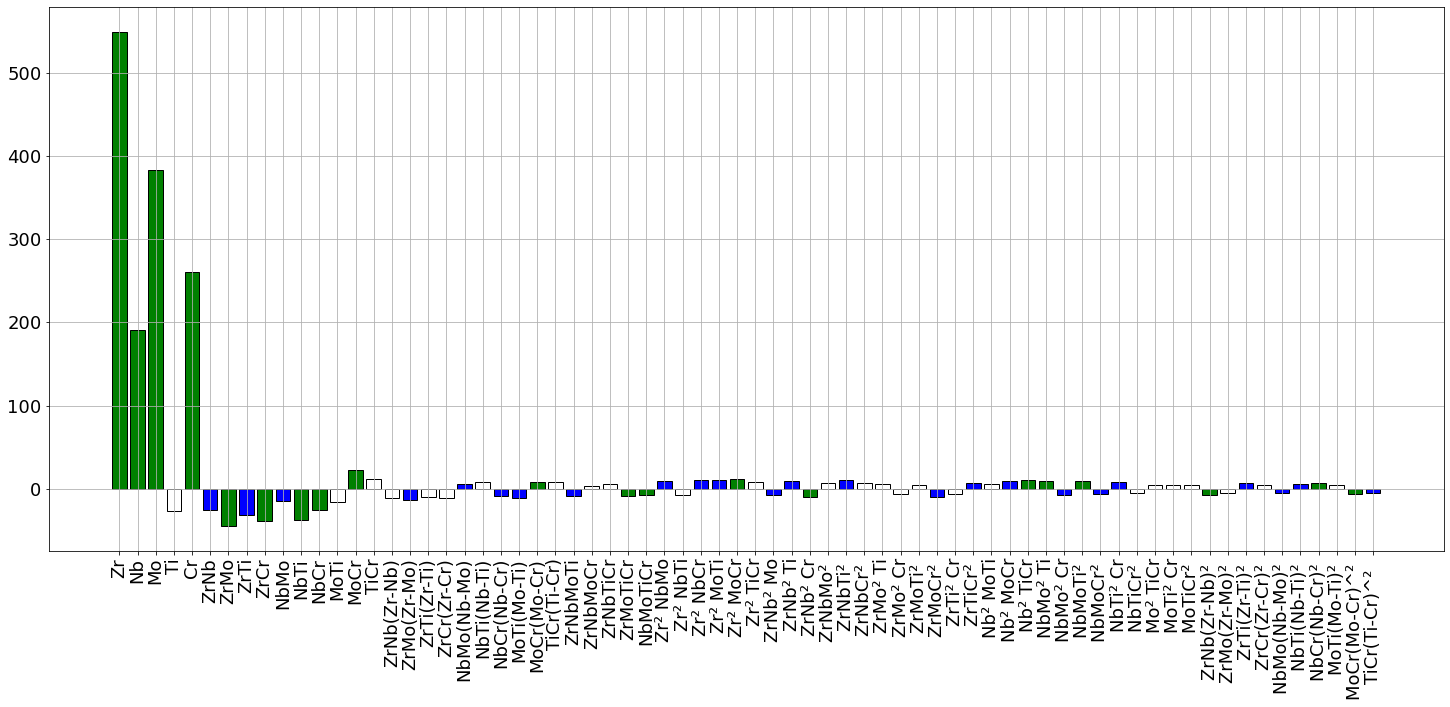

In [28]:
fig=plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 18})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig(f"{run_dir}/interactions_E.png", dpi=300, bbox_inches='tight')
plt.show()
df.to_csv('coeff_regre_multi.csv')
df_corrected.to_csv('coeff_regre_multi_corr.csv')

### For hardness H
#### Import database "Compo_H_wo_outlier" and add the intercation columns

In [29]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [31]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model_expression='H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_adj_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'H',X,y)

predictionH=model.predict(compo2predict)
prediction_MR['MR - Hardness']=predictionH
prediction_MR.to_csv('./prediction_MR.csv')

Coefficients extraction and apply root on coefficient 

In [32]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')    

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      H   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4476.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:23:57   Log-Likelihood:                         -2152.4
No. Observations:                1741   AIC:                                      4445.
Df Residuals:                    1671   BIC:                                      4827.
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr              17.6386      6.224      2.834      0.005       5.432      29.846
Nb               7.8426      2.064      3.800      0.000       3.795      11.890
Mo               8.3035      0.530     15.658      0.000       7.263       9.344
Ti              -9.2377      3.627     -2.547      0.011     -16.352      -2.124
Cr               7.5614      0.527     14.336      0.000       6.527       8.596
Zr:Nb          -26.0126     22.420     -1.160      0.246     -69.988      17.962
Zr:Mo          -49.0739     16.721     -2.935      0.003     -81.870     -16.278
Zr:Ti          227.1466     26.512      8.568      0.000     175.147     279.146
Zr:Cr           65.5493     14.049      4.666      0.000      37.993      93.105
Nb:Mo           25.9543      4.093      6.341      0.000      17.926      33.982
Nb:Ti           26.4558     12.940      2.045      0.041       1.076      51.835
Nb:Cr           74.1101      6.663     11.122      0.000      61.041      87.179
Mo:Ti           50.9380      8.815      5.778      0.000      33.648      68.228
Mo:Cr           15.8066      3.590      4.403      0.000       8.766      22.847
Ti:Cr          142.2209     14.282      9.958      0.000     114.209     170.233
Zr:Nb:Zr_Nb   -247.5690     62.639     -3.952      0.000    -370.428    -124.710
Zr:Mo:Zr_Mo   -413.9324     73.303     -5.647      0.000    -557.707    -270.158
Zr:Ti:Zr_Ti    451.1787     63.389      7.118      0.000     326.849     575.508
Zr:Cr:Zr_Cr    301.2413     44.795      6.725      0.000     213.381     389.102
Nb:Mo:Nb_Mo    -53.6961      6.681     -8.037      0.000     -66.801     -40.591
Nb:Ti:Nb_Ti    229.9520     40.917      5.620      0.000     149.698     310.206
Nb:Cr:Nb_Cr    112.3153     15.939      7.046      0.000      81.052     143.578
Mo:Ti:Mo_Ti   -283.9437     35.914     -7.906      0.000    -354.384    -213.503
Mo:Cr:Mo_Cr    -89.3307      8.564    -10.432      0.000    -106.127     -72.534
Ti:Cr:Ti_Cr     88.3635     25.091      3.522      0.000      39.150     137.577
Zr:Nb:Mo:Ti    -65.6963    137.333     -0.478      0.632    -335.059     203.666
Zr:Nb:Mo:Cr   -336.6999     96.688     -3.482      0.001    -526.342    -147.058
Zr:Nb:Ti:Cr   -121.5073    105.010     -1.157      0.247    -327.471      84.457
Zr:Mo:Ti:Cr     10.5821     99.419      0.106      0.915    -184.417     205.581
Nb:Mo:Ti:Cr   -733.4979     68.245    -10.748      0.000    -867.352    -599.644
Zr2:Nb:Mo      422.8590    213.607      1.980      0.048       3.894     841.824
Zr2:Nb:Ti      232.9484    478.584      0.487      0.627    -705.739    1171.636
Zr2:Nb:Cr    -1310.9073    228.096     -5.747      0.000   -1758.292    -863.523
Zr2:Mo:Ti    -1782.2230    337.424     -5.282      0.000   -2444.041

Plot coefficients 

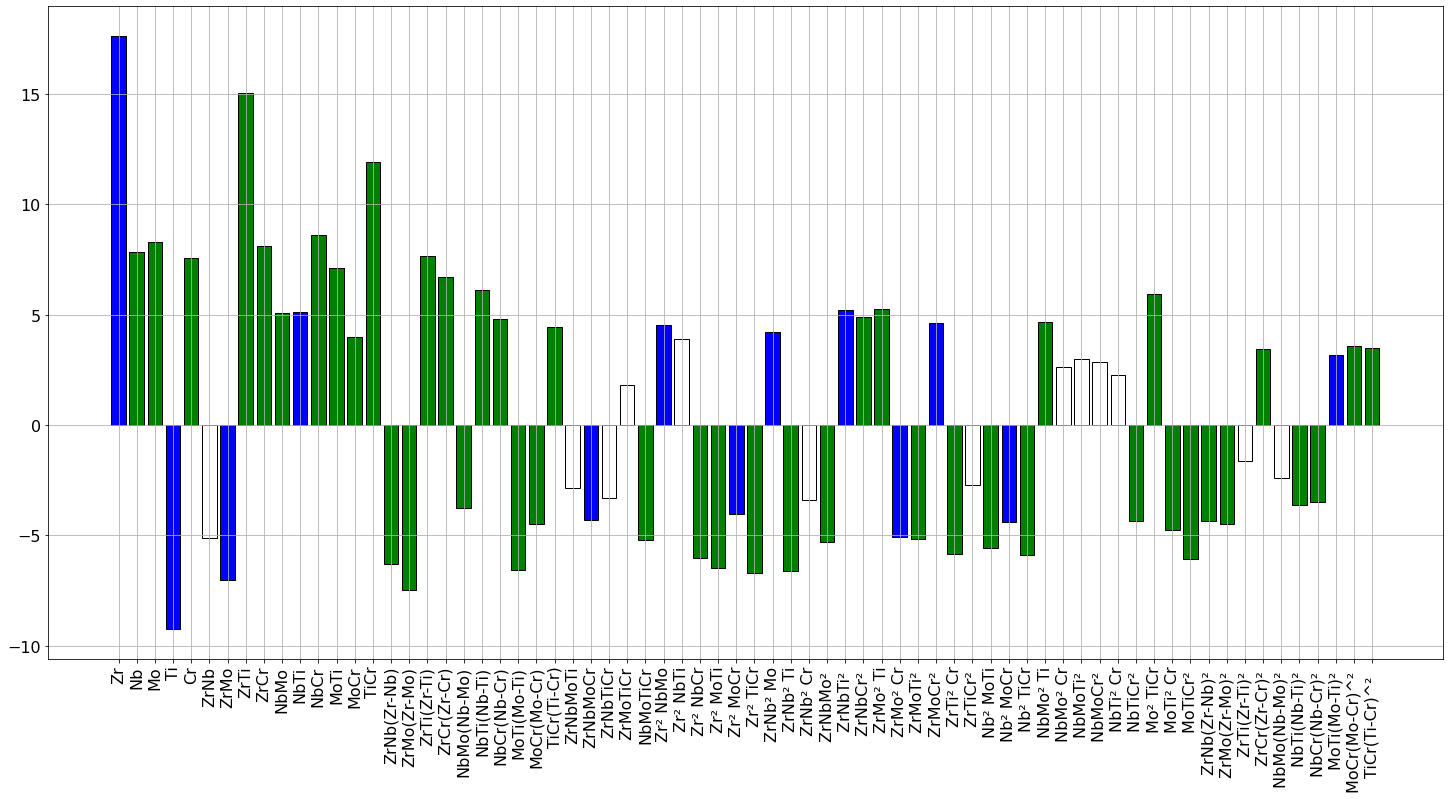

In [33]:
fig=plt.figure(figsize=(25,12))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig(f"{run_dir}/interactions_H.png", dpi=300, bbox_inches='tight')
plt.show()

df.to_csv('coeff_regre_multi.csv')
df_corrected.to_csv('coeff_regre_multi_corr.csv')